<a href="https://colab.research.google.com/github/siglimumuni/Published-Articles/blob/main/Time_Series_Forecasting_with_Long_Short_Term_Memory_(LSTM)_Networks_An_implementation_with_Tensorflow_and%C2%A0Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the relevant libraries

In [2]:
#import the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Loading and previewing the data

In [3]:
#read in the csv file with the air passengers data and rename the #passengers column
df = pd.read_csv('https://raw.githubusercontent.com/siglimumuni/Datasets/master/AirPassengers.csv').rename(columns={'#Passengers':'Passengers'})

#print first and last 5 rows of the dataframe
display(df.head())
display(df.tail())

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


## Visualizing the data

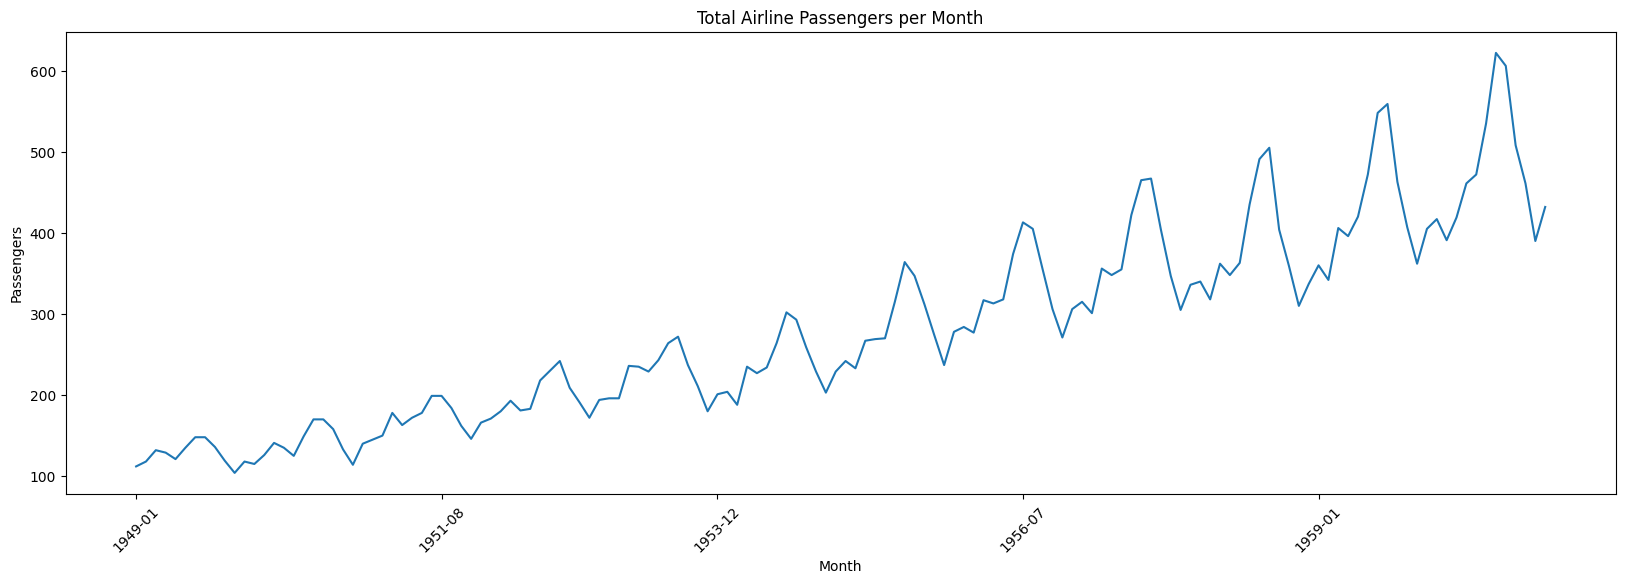

In [4]:
#plot total passengers per month
plt.figure(figsize=[20,6])
ax = sns.lineplot(data=df,x='Month', y='Passengers')
ax.set_title('Total Airline Passengers per Month')
ax.xaxis.set_major_locator(md.AutoDateLocator())
plt.xticks(rotation=45)
plt.show()

## Preparing the data

In [5]:
#set the index to the Month column
df = df.set_index('Month')

#set the test size
test_size = 12

#slice dataset into two: train and test based on test size
df_train = df[:-test_size]
df_test = df[-test_size:]

#print the dimensions of the partitions
print(df_train.shape, df_test.shape)

(132, 1) (12, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler

#initialize a MinMaxScaler object and set values to between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

#fit the train set
scaler.fit(df_train)

#trainsform the train and test sets
scaled_train = scaler.transform(df_train)
scaled_test = scaler.transform(df_test)

## Creating the Time Series Generator

In [7]:
from keras.preprocessing.sequence import TimeseriesGenerator

#set the number of input values for each iteration
n_inputs = 12

#initialize generator object and pass in parameters
generator = TimeseriesGenerator(data = scaled_train,targets = scaled_train, length = n_inputs, batch_size=3)

#print example
for i in range(len(generator)):
    X, y = generator[i]

## Building the model

In [8]:
#set the number of features eg univariate = 1
n_features = 1

#build an LSTM model and specify parameters
model = Sequential()
model.add(LSTM(100,input_shape = (n_inputs, n_features),activation='relu',return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 83,105
Trainable params: 83,105
Non-trainable params: 0
_________________________________________________________________


## Fitting the training data to the model

In [9]:
#fit model to training data and set epochs to 100
model.fit(generator, epochs = 100, verbose=2)

Epoch 1/100
40/40 - 3s - loss: 0.0452 - 3s/epoch - 70ms/step
Epoch 2/100
40/40 - 0s - loss: 0.0182 - 383ms/epoch - 10ms/step
Epoch 3/100
40/40 - 1s - loss: 0.0123 - 518ms/epoch - 13ms/step
Epoch 4/100
40/40 - 1s - loss: 0.0129 - 505ms/epoch - 13ms/step
Epoch 5/100
40/40 - 1s - loss: 0.0141 - 566ms/epoch - 14ms/step
Epoch 6/100
40/40 - 0s - loss: 0.0108 - 383ms/epoch - 10ms/step
Epoch 7/100
40/40 - 0s - loss: 0.0143 - 377ms/epoch - 9ms/step
Epoch 8/100
40/40 - 0s - loss: 0.0106 - 385ms/epoch - 10ms/step
Epoch 9/100
40/40 - 0s - loss: 0.0156 - 386ms/epoch - 10ms/step
Epoch 10/100
40/40 - 0s - loss: 0.0109 - 367ms/epoch - 9ms/step
Epoch 11/100
40/40 - 0s - loss: 0.0105 - 399ms/epoch - 10ms/step
Epoch 12/100
40/40 - 0s - loss: 0.0113 - 371ms/epoch - 9ms/step
Epoch 13/100
40/40 - 0s - loss: 0.0159 - 376ms/epoch - 9ms/step
Epoch 14/100
40/40 - 0s - loss: 0.0114 - 392ms/epoch - 10ms/step
Epoch 15/100
40/40 - 0s - loss: 0.0122 - 392ms/epoch - 10ms/step
Epoch 16/100
40/40 - 0s - loss: 0.0103 - 

## Plotting results of model training

In [ ]:
#plot the training history
plt.plot(model.history.history['loss'])
plt.show()

## Generate predictions of the test data

In [11]:
predictions = []

first_batch = scaled_train[-n_inputs:]
current_batch = first_batch.reshape(1, n_inputs, n_features)

for i in range(len(scaled_test)):
    batch = current_batch
    pred = model.predict(batch)[0]
    predictions.append(pred)
    current_batch = np.append(current_batch[:,1:,:], [[pred]], axis=1)

predictions

1/1 [==============================] - 0s 18ms/step


[array([0.59616935], dtype=float32),
 array([0.5979243], dtype=float32),
 array([0.66334146], dtype=float32),
 array([0.67706937], dtype=float32),
 array([0.73785144], dtype=float32),
 array([0.8758696], dtype=float32),
 array([1.0096995], dtype=float32),
 array([1.0272412], dtype=float32),
 array([0.84222007], dtype=float32),
 array([0.70150316], dtype=float32),
 array([0.6377735], dtype=float32),
 array([0.65767485], dtype=float32)]

In [12]:
#denormalize the predicted values
predictions_transformed = np.round(scaler.inverse_transform(predictions),0)

#convert the predicted values to integers
predictions_final = predictions_transformed.astype(int)
predictions_final

array([[375],
       [376],
       [406],
       [412],
       [440],
       [503],
       [563],
       [571],
       [487],
       [423],
       [394],
       [403]])

In [58]:
#create dataframe of actuals and predicted values
df_preds_actuals = pd.DataFrame({'Actuals':df_test['Passengers'],'Predicted':predictions_final.flatten()}).reset_index()
df_preds_actuals

,Month,Actuals,Predicted
0,1960-01,417,375
1,1960-02,391,376
2,1960-03,419,406
3,1960-04,461,412
4,1960-05,472,440
5,1960-06,535,503
6,1960-07,622,563
7,1960-08,606,571
8,1960-09,508,487
9,1960-10,461,423


In [56]:
df_test['Passengers']

Month
1960-01    417
1960-02    391
1960-03    419
1960-04    461
1960-05    472
1960-06    535
1960-07    622
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: Passengers, dtype: int64

In [14]:
#convert the actual and predicted columns to seriees
actuals = df_preds_actuals['Actuals']
predicted = df_preds_actuals['Predicted']

#create a function to calculate MAPE
def mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

#print MAPE
print(f"The Mean Absolute Percentage Error is {round(mape(actuals,predicted),1)}")

The Mean Absolute Percentage Error is 6.3


In [16]:
#create a function to calculate RMSE
def rmse(actual,pred):
  return np.sqrt(((actual - pred)**2).mean())

#print RMSE
print(f'The Root Mean Squared Error is {round(rmse(actuals, predicted))}')

The Root Mean Squared Error is 34


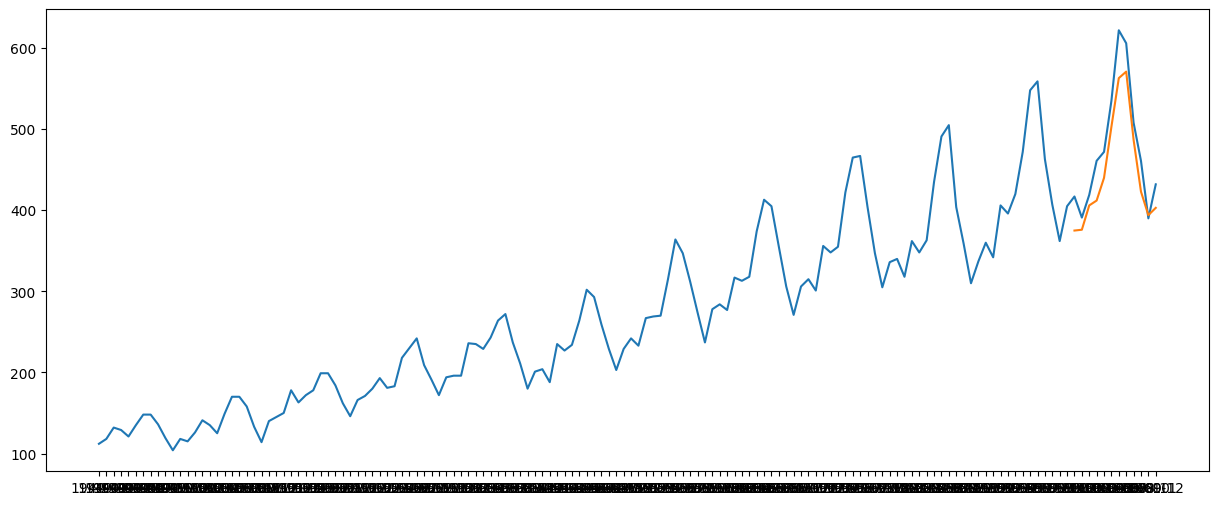

In [17]:
#plot a line chart with actuals and predicted values
plt.figure(figsize=(15,6))
plt.plot(df.index, df['Passengers'])
plt.plot(df.iloc[-test_size:].index,df_preds_actuals['Predicted'])
plt.show()

## Generating a 12 month forecast

In [34]:
future_forecast = []

future_data = df.iloc[-n_inputs:]
future_scaled = scaler.transform(future_data)
future_sequence = np.array([future_scaled])

first_batch = future_scaled
current_batch = first_batch.reshape(1, n_inputs, 1)

for i in range(len(future_scaled)):
    batch = current_batch
    pred = model.predict(batch)[0]
    future_forecast.append(pred)
    current_batch = np.append(current_batch[:,1:,:], [[pred]], axis=1)

future_forecast

1/1 [==============================] - 0s 19ms/step


[array([0.68330175], dtype=float32),
 array([0.669115], dtype=float32),
 array([0.7139837], dtype=float32),
 array([0.7752731], dtype=float32),
 array([0.838852], dtype=float32),
 array([0.98825425], dtype=float32),
 array([1.0915979], dtype=float32),
 array([1.1022005], dtype=float32),
 array([0.93245584], dtype=float32),
 array([0.7902948], dtype=float32),
 array([0.6903497], dtype=float32),
 array([0.7087491], dtype=float32)]

In [35]:
#denormalize forecasted data
future_forecast = scaler.inverse_transform(future_forecast)

#convert to integers
future_forecast = future_forecast.astype(int)

future_forecast

array([[414],
       [408],
       [428],
       [456],
       [485],
       [553],
       [600],
       [605],
       [528],
       [463],
       [418],
       [426]])

In [36]:
#save the model to your local drive
model.save("/Users/sig/Desktop/LSTM_airline_passengers_v1.keras")